# Model based on sentence features
***
Libraries:

In [1]:
!pip install transformers
!pip install -q pyyaml h5py
import pandas as pd
from transformers import *
import numpy as np
from sklearn.model_selection import train_test_split


     |████████████████████████████████| 645kB 1.9MB/s 
     |████████████████████████████████| 890kB 9.8MB/s 
     |████████████████████████████████| 1.0MB 16.9MB/s 
     |████████████████████████████████| 3.8MB 21.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=0472c4c7be014dd23c1324039aabf08969275ad46ef1aea5d5034511f380ae9c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


## Data preprocessing 
- reading data 
- change columns names 
- drop NaN rows 
- fill others NaN values by special sign

In [2]:
df = pd.read_excel('englishOriginalDataset.xlsx')
df.reset_index()
df = df.iloc[:,[2,3,5,8,9,11,12,13]]
df.columns = ["verb_veridial_positive",
              "verb_veridical_negative",
              "semantic_characteristic",
              "standford_signature_for_that",
              "standford_signature_for_to",
              "complementizer",
              "verb_tense",
              "semantic_relation"]
df.dropna(inplace=True, axis = 0, how = 'all')
df.fillna(axis = 0, inplace =True, value="none")
df.head()

,verb_veridial_positive,verb_veridical_negative,semantic_characteristic,standford_signature_for_that,standford_signature_for_to,complementizer,verb_tense,semantic_relation
0,o,o,epistemiczny,o/o,none,that,present,N
1,o,o,emotywny,none,none,that,present,N
2,o,o,mówienia,nie ma,none,that,present,N
3,o,o,epistemiczny,o/o,none,that,present,N
4,o,o,epistemiczny,nie ma,none,that,past,E


### cleaning data by deleting uncertainty - simplification 


In [3]:
#verb veridical positive cleaning
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '+' if '+' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '-' if '-' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridial_positive = df.verb_veridial_positive.apply(lambda x: '?' if '?' in x else x)

#verb veridical negative cleaning
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '1' if '1' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '?' if '?' in x else x)

#df.semantic_characteristic.unique() cleaning not needed
#df.standford_signature_for_that.unique() cleaning not needed
#df.standford_signature_for_to.unique() cleaning not needed
#df.complementizer.unique() cleaning not needed

#df.verb_tense cleaning
df.verb_tense = df.verb_tense.apply(lambda x: 'present' if 'present' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'past' if 'past' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'future' if 'future' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: 'none' if 'none' in x else x)
df.verb_tense = df.verb_tense.apply(lambda x: '?' if '?' in x else x)

df.head()

,verb_veridial_positive,verb_veridical_negative,semantic_characteristic,standford_signature_for_that,standford_signature_for_to,complementizer,verb_tense,semantic_relation
0,o,o,epistemiczny,o/o,none,that,present,N
1,o,o,emotywny,none,none,that,present,N
2,o,o,mówienia,nie ma,none,that,present,N
3,o,o,epistemiczny,o/o,none,that,present,N
4,o,o,epistemiczny,nie ma,none,that,past,E


In [4]:
print(df.verb_veridial_positive.unique())
print(df.verb_veridical_negative.unique())
print(df.semantic_characteristic.unique())
print(df.standford_signature_for_that.unique())
print(df.standford_signature_for_to.unique())
print(df.complementizer.unique())
print(df.verb_tense.unique())
print(df.semantic_relation.unique())

['o' '+' '-' '?']
['o' '+' '-' '?' '1']
['epistemiczny' 'emotywny' 'mówienia' 'ontyczny' 'wynikania'
 'określające dostęp do wiedzy' 'percepcyjny' 'pamięciowy' 'odkrycia'
 'czynnościowy' 'epistemiczno-percepcyjny' 'pokazywania' 'dowodzenia'
 'mówieniowo-pamięciowy' 'liczenia' 'wnioskowania'
 'percepcyjno-mówieniowy' 'zdarzeniowy']
['o/o' 'none' 'nie ma' '"+/o"' '"+/+"' 'o/+']
['none' 'o/o']
['that' 'to']
['present' 'past' 'none' 'future' '?']
['N' 'E' '?' 'C']


In [0]:
df.to_csv("engData.csv", index=False)

### vectorize data and split to features and target

Ml classifier labels - target for RandomForest

In [0]:
ml_classifier_labels = df["semantic_relation"]

##### Vectorize (one =hot encoding)

In [0]:
df = pd.get_dummies(df)

##### Split to features and target

In [0]:
X = df.iloc[:,0:-4]
y = df.iloc[:,-4:]

##### Features columns

In [9]:
X.columns

Index(['verb_veridial_positive_+', 'verb_veridial_positive_-',
       'verb_veridial_positive_?', 'verb_veridial_positive_o',
       'verb_veridical_negative_+', 'verb_veridical_negative_-',
       'verb_veridical_negative_1', 'verb_veridical_negative_?',
       'verb_veridical_negative_o', 'semantic_characteristic_czynnościowy',
       'semantic_characteristic_dowodzenia',
       'semantic_characteristic_emotywny',
       'semantic_characteristic_epistemiczno-percepcyjny',
       'semantic_characteristic_epistemiczny',
       'semantic_characteristic_liczenia', 'semantic_characteristic_mówienia',
       'semantic_characteristic_mówieniowo-pamięciowy',
       'semantic_characteristic_odkrycia',
       'semantic_characteristic_określające dostęp do wiedzy',
       'semantic_characteristic_ontyczny',
       'semantic_characteristic_pamięciowy',
       'semantic_characteristic_percepcyjno-mówieniowy',
       'semantic_characteristic_percepcyjny',
       'semantic_characteristic_pokazywani

##### Target columns

In [10]:
y.columns

Index(['semantic_relation_?', 'semantic_relation_C', 'semantic_relation_E',
       'semantic_relation_N'],
      dtype='object')

#### k-fold crossvalidation preparing

In [0]:
k=7
from sklearn.model_selection import KFold
kfold = KFold(n_splits = k, shuffle=True)

acc_per_fold = []
loss_per_fold = [] 

***
# Keras model building

In [12]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Training with 7-crossvalidation.

In [13]:
fold_no = 1 

#get number of columns in training data
n_cols = X.shape[1]
print(n_cols)

for train, test in kfold.split(X,y):

  # model architecture  
  model = tf.keras.Sequential()
  model.add(Dense(25, activation='relu', input_shape=(n_cols,)))
  model.add(tf.keras.layers.Dropout(rate=0.3))
  model.add(Dense(15, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.3))
  model.add(Dense(25, activation=keras.layers.LeakyReLU(alpha=0.3)))
  model.add(tf.keras.layers.Dropout(rate=0.3))
  model.add(Dense(4, activation='softmax'))

  # model compile 
  model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics = ['accuracy'])
  
  # training
  history = model.fit(X.iloc[train], y.iloc[train], validation_split=0.2, epochs=70, verbose=0)

  # scores 
  scores = model.evaluate(X.iloc[test], y.iloc[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # iterator up
  fold_no = fold_no + 1

42
Score for fold 1: loss of 0.4648497700691223; accuracy of 86.94267272949219%
Score for fold 2: loss of 0.4200916588306427; accuracy of 87.26114630699158%
Score for fold 3: loss of 0.43561574816703796; accuracy of 88.21656107902527%
Score for fold 4: loss of 0.44618216156959534; accuracy of 88.21656107902527%
Score for fold 5: loss of 0.41586387157440186; accuracy of 88.4984016418457%
Score for fold 6: loss of 0.48174747824668884; accuracy of 87.22044825553894%
Score for fold 7: loss of 0.30662691593170166; accuracy of 90.09584784507751%


### Scores

In [14]:
# == Provide average scores ==
print('Score per fold:')
for i in range(0, len(acc_per_fold)):
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score per fold:
> Fold 1 - Loss: 0.4648497700691223 - Accuracy: 86.94267272949219%
> Fold 2 - Loss: 0.4200916588306427 - Accuracy: 87.26114630699158%
> Fold 3 - Loss: 0.43561574816703796 - Accuracy: 88.21656107902527%
> Fold 4 - Loss: 0.44618216156959534 - Accuracy: 88.21656107902527%
> Fold 5 - Loss: 0.41586387157440186 - Accuracy: 88.4984016418457%
> Fold 6 - Loss: 0.48174747824668884 - Accuracy: 87.22044825553894%
> Fold 7 - Loss: 0.30662691593170166 - Accuracy: 90.09584784507751%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 88.06451984814235 (+- 0.9983691538490956)
> Loss: 0.42442537205559866
------------------------------------------------------------------------


## plot with train and test accuracy

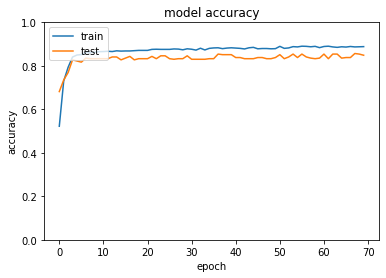

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

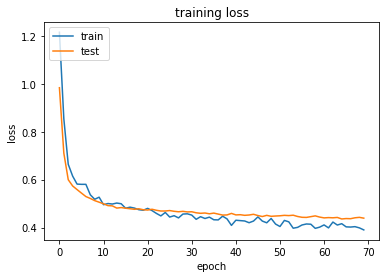

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save model 


In [0]:
model.save('featureModelEng.h5')

Confusion matrix 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


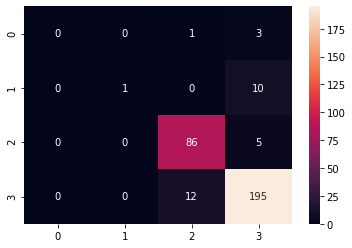

In [18]:
X_conf_matrix = X.iloc[test]
y_conf_matrix = y.iloc[test]
predicted_conf_matrix = model.predict_classes(X_conf_matrix)

conf_matrix = confusion_matrix(y_conf_matrix.values.argmax(axis=1), predicted_conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d")

## Check RANDOM FOREST Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random_forest = RandomForestClassifier(
    n_estimators = 2000, 
)

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, ml_classifier_labels, test_size=0.33, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

(725,)
['?' 'C' 'E' 'N']
(725,)
(array(['?', 'C', 'E', 'N'], dtype=object), array([ 20,  22, 230, 453]))


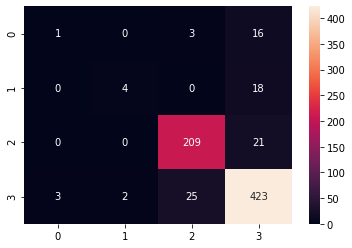

In [22]:
predict = random_forest.predict(X_test)
print(predict.shape)
print(np.unique(predict))
print(y_test.shape)
print(np.unique(y_test, return_counts = True))
conf_matrix = confusion_matrix(y_test, predict)
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [23]:
random_forest.score(X_test, y_test)

0.8786206896551724